In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict
import os


# interpolation

In [48]:
files = {
    'fasttext': 'log/WRD_COS_interpolation_fasttext.csv',
    'fasttext_sw': 'log/WRD_COS_interpolation_fasttext_sw.csv',
    'glove42b': 'log/WRD_COS_interpolation_glove42b.csv',
    'glove840b':'log/WRD_COS_interpolation_glove840b.csv',
    'paragram': 'log/WRD_COS_interpolation_paragram.csv',
    'paranmt': 'log/WRD_COS_interpolation_paranmt.csv',
    'psl': 'log/WRD_COS_interpolation_psl.csv'
}
files = {
    'SUP+PSL': 'log/Interpolation_SUP_psl.csv'
}

In [290]:
def plot_interp(ax, pre, vectors):
    f = 'log/Interpolation_dev_{}_{}.csv'.format(pre, vectors)
    df = pd.read_csv(f)
    c_arr = df['coef_C'].unique()
    p_arr = df['coef_P'].unique()
    interp_matrix = np.zeros((len(c_arr), len(p_arr)))
    print(c_arr, p_arr)
    for i, (c, p, l, m, r) in df.iterrows():
        ic = i // len(p_arr)
        ip = i % len(p_arr)
        interp_matrix[ic, ip] = m
    interp_matrix *= 100
    im = ax.contourf(interp_matrix[:, :11], cmap='cool')
    if vectors == 'paranmt':
#         ax.set_xticks(np.arange(11))
#         ax.set_xticklabels(["{:.2f}".format(v) for v in p_arr[:11].tolist()], rotation=45)
        ax.set_xticks([0, 3, 6, 10])
        ax.set_xticklabels(["0", "0.6", "10", "400"], rotation=45)
        ax.set_xlabel(r"$\epsilon$", fontsize=12)
    else:
        ax.set_xticks([])
    if pre == 'SUP':
        ax.set_yticks([0, 5, 10])
        ax.set_yticklabels(["0", "0.5", "1"])
        ax.set_ylabel(r"$\alpha$".format(vectors), fontsize=12)
    else:
        ax.set_yticks([])
        
    ind = np.unravel_index(np.argmax(interp_matrix, axis=None), interp_matrix.shape)
    ax.scatter(ind[1], ind[0], c='black')
    interp = interp_matrix[ind]
    wrd = interp_matrix[0][0]
    cos = interp_matrix[-1][-1]
    ax.set_title("({:.2f}, {:.2f}, {:.2f})".format(wrd, interp, cos), fontsize=10)
    return im


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.00000000e+01 2.51188643e+01
 6.30957344e+01 1.58489319e+02 3.98107171e+02]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.00000000e+01 2.51188643e+01
 6.30957344e+01 1.58489319e+02 3.98107171e+02]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.00000000e+01 2.51188643e+01
 6.30957344e+01 1.58489319e+02 3.98107171e+02]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.00000000e+01 2.51188643e+01
 6.30957344e+01 1.58489319e+02 3.98107171e+02]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.00000000e+00 1.00000000e-01 2.51188643e-01 6.30957344e-01
 1.58489319e+00 3.98107171e+00 1.

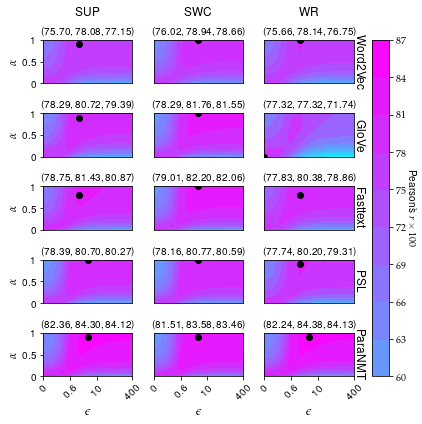

In [319]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(6, 6))
images = []
for i, vectors in enumerate(['word2vec', 'glove840b', 'fasttext', 'psl', 'paranmt']):
    for j, pre in enumerate(['SUP', 'SWC', 'WR']):
        f = 'log/Interpolation_{}_{}.csv'.format(pre, vectors)
        if os.path.exists(f):
            im = plot_interp(ax[i][j], pre, vectors)
            images.append(im)

from matplotlib import colors
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)

def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())


for im in images:
    im.callbacksSM.connect('changed', update)
    
pad = 5
for a, col in zip(ax[0], ['SUP', 'SWC', 'WR']):
    a.annotate(col, xy=(0.5, 1), xytext=(0, 5* pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for a, row in zip(ax[:,-1], ['Word2Vec', 'GloVe', 'Fasttext', 'PSL', 'ParaNMT']):
    a.annotate(row, xy=(0, 0.5), xytext=(105, 0),
                xycoords=a.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=-90)
    
fig.tight_layout()
cb = fig.colorbar(images[-1], ax=ax, orientation='vertical', fraction=.1)
cb.set_label(r"Pearson's $r\times 100$", rotation=270, labelpad=10)
fig.savefig('/Users/zihao/Nutstore Files/我的坚果云/Research/Sentence Similarity + Prior OT/acl-ijcnlp2021-templates/interp_dev.pdf')

In [243]:
def get_subtable(df, word_vector, merge_STS=False):
    sdf = df[df['word vector'] == word_vector]
    data = defaultdict(list)

    datasets = datasets_core
    models = sdf['model'].unique()
    
    for ds in datasets:
        for m in models:
            _sdf = sdf[sdf['dataset'] == ds]
            _sdf = _sdf[_sdf['model'] == m]
            score_sr = _sdf['score']
            if len(score_sr):
                score = float(score_sr.tolist()[0])
                data[ds].append(score)
                
    if merge_STS:
        sts_list = ["sts:" + str(y) for y in range(2012, 2017)]
        for sts in sts_list:
            score_arr = np.asarray([data[ds] for ds in datasets if sts in ds])
            score = np.mean(score_arr, axis=0).tolist()
            data[sts] = score
        
    nds = pd.DataFrame(data, index=models)
    return nds, data

    

# Major Comparison

In [532]:
from model.word_vector import VectorNames
datasets_short_list = [
    'stsb:test',
#     'stsb:dev',
#     'twitter:test',
    'sick:r', 
    'sts:2012',
    'sts:2013',
    'sts:2014',
    'sts:2015',
    'sts:2016',
]
datasets_full_list = [
    'stsb:test',
    'twitter:test',
    'sick:r', 
    'sts:2012',
    'sts:2013',
    'sts:2014',
    'sts:2015',
    'sts:2016',
]
datasets_core = [
    'stsb:test',
#     'stsb:dev',
    'twitter:test',
    'sick:r',
]

In [533]:
def show_rots(which_rots=None, sort=False, save=True, prefix="", datasets=[]):
    baselinefiles = {
        'COS+SUP': "log/major_compare_COS+SUP/major_comparison.csv",
        'WRD+SUP': 'log/major_compare_WRD+SUP/major_comparison.csv',        
        'WRD+SUP+levels': 'log/major_compare_WRD+SUP+levels/major_comparison.csv',
        'ROTS+SUP': "log/major_compare_ROTS+SUP/major_comparison.csv",
   
        'COS+SWC': "log/major_compare_COS+SWC/major_comparison.csv",
        'WRD+SWC': 'log/major_compare_WRD+SWC/major_comparison.csv',
        'WRD+SWC+levels': 'log/major_compare_WRD+SWC+levels/major_comparison.csv',
        'ROTS+SWC': "log/major_compare_ROTS+SWC/major_comparison.csv",
        
        'COS+WR': "log/major_compare_COS+WR/major_comparison.csv",
        'WRD+WR': 'log/major_compare_WRD+WR/major_comparison.csv',
        'WRD+WR+levels': 'log/major_compare_WRD+WR+levels/major_comparison.csv',
        'ROTS+WR': "log/major_compare_ROTS+WR/major_comparison.csv"
    }
    rotfiles = {
#         'rots': "log/major_compareROTS/major_comparison.csv",
#         'rotsC2': "log/major_compare_ROTS_C=0/major_comparison.csv",
#         'rotsC3': "log/major_compare_ROTS_C_linear1-0/major_comparison.csv",
    }
    df = pd.DataFrame()
    for k, path in baselinefiles.items():
        _df = pd.read_csv(path)
        df = df.append(_df)

    if which_rots in rotfiles:
        _df = pd.read_csv(rotfiles[which_rots])
        df = df.append(_df)
    else:
        for which_rots in rotfiles:
            _df = pd.read_csv(rotfiles[which_rots])
            df = df.append(_df)

    for wv in VectorNames:
        nds, _ = get_subtable(df, wv)
        print("="*10)
        print(wv)
        if len(datasets):
            show = nds[datasets]
        else:
            show = nds
#         show = nds
        show['mean'] = show.agg('mean', axis='columns')
        if sort:
            show = show.sort_values('mean', ascending=False)
        show = show.applymap(lambda f: "{:.2f}".format(f*100))
        print(show.to_string())
        if save:
            show.to_csv('out/{}-{}.csv'.format(prefix, wv), index_label='similarity')

        
def get_subtable(df, word_vector, merge_STS=True):
    sdf = df[df['word vector'] == word_vector]
    data = defaultdict(list)

    datasets = sdf['dataset'].unique()
    models = sdf['model'].unique()
#     models = []
#     for m in _models:
#         if m.split('+')[0] == 'ROTS' and not m.endswith('4'):
#             continue
#         models.append(m)
    
    for ds in datasets:
        for m in models:
            _sdf = sdf[sdf['dataset'] == ds]
            _sdf = _sdf[_sdf['model'] == m]
            score_sr = _sdf['score']
            if len(score_sr):
                score = float(score_sr.tolist()[0])
                data[ds].append(score)
                
    if merge_STS:
        sts_list = ["sts:" + str(y) for y in range(2012, 2017)]
        for sts in sts_list:
            score_arr = np.asarray([data[ds] for ds in datasets if sts in ds])
            score = np.mean(score_arr, axis=0).tolist()
            data[sts] = score
    model_names = []
    for m in models:
        if 'levels' in m:
            m = m.replace('levels', 'L')
        model_names.append(m)
    nds = pd.DataFrame(data, index=model_names)
    return nds, data

In [534]:
kvs = [
    ('ablation-depth', ['stsb:test']),
    ('benchmark', datasets_short_list),
    ('ablation-core', datasets_core),
    ('full-list', datasets_full_list)
]
for prefix, datasets in kvs:
    show_rots(sort=False, prefix=prefix, datasets=datasets)

psl
             stsb:test   mean
COS+SUP          73.50  73.50
WRD+SUP          73.78  73.78
WRD+SUP+L0       73.50  73.50
WRD+SUP+L1       67.51  67.51
WRD+SUP+L2       68.96  68.96
WRD+SUP+L3       70.92  70.92
WRD+SUP+L4       72.25  72.25
ROTS+SUP0        73.50  73.50
ROTS+SUP1        73.76  73.76
ROTS+SUP2        73.95  73.95
ROTS+SUP3        73.95  73.95
ROTS+SUP4        74.48  74.48
ROTS+SUPmean     74.19  74.19
ROTS+SUPmax      74.42  74.42
ROTS+SUPmin      73.52  73.52
ROTS+SUPlast     74.24  74.24
COS+SWC          74.22  74.22
WRD+SWC          73.01  73.01
WRD+SWC+L0       73.93  73.93
WRD+SWC+L1       66.32  66.32
WRD+SWC+L2       67.76  67.76
WRD+SWC+L3       69.95  69.95
WRD+SWC+L4       71.31  71.31
ROTS+SWC0        73.93  73.93
ROTS+SWC1        74.06  74.06
ROTS+SWC2        74.15  74.15
ROTS+SWC3        74.14  74.14
ROTS+SWC4        74.47  74.47
ROTS+SWCmean     74.37  74.37
ROTS+SWCmax      74.41  74.41
ROTS+SWCmin      74.03  74.03
ROTS+SWClast     74.37  74.37
COS+WR

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


paranmt
             stsb:test   mean
COS+SUP          79.55  79.55
WRD+SUP          79.05  79.05
WRD+SUP+L0       79.55  79.55
WRD+SUP+L1       74.50  74.50
WRD+SUP+L2       75.42  75.42
WRD+SUP+L3       76.33  76.33
WRD+SUP+L4       77.61  77.61
ROTS+SUP0        79.55  79.55
ROTS+SUP1        79.73  79.73
ROTS+SUP2        79.73  79.73
ROTS+SUP3        79.54  79.54
ROTS+SUP4        79.74  79.74
ROTS+SUPmean     79.81  79.81
ROTS+SUPmax      79.74  79.74
ROTS+SUPmin      79.29  79.29
ROTS+SUPlast     79.37  79.37
COS+SWC          79.70  79.70
WRD+SWC          77.98  77.98
WRD+SWC+L0       79.71  79.71
WRD+SWC+L1       72.47  72.47
WRD+SWC+L2       73.87  73.87
WRD+SWC+L3       75.08  75.08
WRD+SWC+L4       76.34  76.34
ROTS+SWC0        79.71  79.71
ROTS+SWC1        79.78  79.78
ROTS+SWC2        79.70  79.70
ROTS+SWC3        79.47  79.47
ROTS+SWC4        79.48  79.48
ROTS+SWCmean     79.79  79.79
ROTS+SWCmax      79.45  79.45
ROTS+SWCmin      79.63  79.63
ROTS+SWClast     79.28  79.28
CO

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


fasttext
             stsb:test   mean
COS+SUP          73.47  73.47
WRD+SUP          74.80  74.80
WRD+SUP+L0       73.47  73.47
WRD+SUP+L1       69.78  69.78
WRD+SUP+L2       71.18  71.18
WRD+SUP+L3       72.51  72.51
WRD+SUP+L4       73.64  73.64
ROTS+SUP0        73.47  73.47
ROTS+SUP1        73.77  73.77
ROTS+SUP2        74.02  74.02
ROTS+SUP3        74.05  74.05
ROTS+SUP4        74.69  74.69
ROTS+SUPmean     74.25  74.25
ROTS+SUPmax      74.58  74.58
ROTS+SUPmin      73.36  73.36
ROTS+SUPlast     74.30  74.30
COS+SWC          74.78  74.78
WRD+SWC          74.58  74.58
WRD+SWC+L0       74.59  74.59
WRD+SWC+L1       68.48  68.48
WRD+SWC+L2       70.17  70.17
WRD+SWC+L3       71.94  71.94
WRD+SWC+L4       73.18  73.18
ROTS+SWC0        74.60  74.60
ROTS+SWC1        74.84  74.84
ROTS+SWC2        75.08  75.08
ROTS+SWC3        75.25  75.25
ROTS+SWC4        75.66  75.66
ROTS+SWCmean     75.33  75.33
ROTS+SWCmax      75.53  75.53
ROTS+SWCmin      74.80  74.80
ROTS+SWClast     75.47  75.47
C

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


glove840b
             stsb:test   mean
COS+SUP          69.54  69.54
WRD+SUP          71.97  71.97
WRD+SUP+L0       69.54  69.54
WRD+SUP+L1       64.66  64.66
WRD+SUP+L2       67.43  67.43
WRD+SUP+L3       69.47  69.47
WRD+SUP+L4       70.61  70.61
ROTS+SUP0        69.54  69.54
ROTS+SUP1        70.03  70.03
ROTS+SUP2        70.62  70.62
ROTS+SUP3        70.94  70.94
ROTS+SUP4        71.79  71.79
ROTS+SUPmean     70.96  70.96
ROTS+SUPmax      71.57  71.57
ROTS+SUPmin      69.87  69.87
ROTS+SUPlast     71.49  71.49
COS+SWC          73.14  73.14
WRD+SWC          72.34  72.34
WRD+SWC+L0       72.92  72.92
WRD+SWC+L1       65.75  65.75
WRD+SWC+L2       67.82  67.82
WRD+SWC+L3       69.74  69.74
WRD+SWC+L4       70.93  70.93
ROTS+SWC0        72.93  72.93
ROTS+SWC1        73.19  73.19
ROTS+SWC2        73.51  73.51
ROTS+SWC3        73.70  73.70
ROTS+SWC4        74.18  74.18
ROTS+SWCmean     73.77  73.77
ROTS+SWCmax      74.01  74.01
ROTS+SWCmin      73.24  73.24
ROTS+SWClast     74.01  74.01


<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


word2vec
             stsb:test   mean
COS+SUP          69.00  69.00
WRD+SUP          70.77  70.77
WRD+SUP+L0       69.00  69.00
WRD+SUP+L1       64.92  64.92
WRD+SUP+L2       67.34  67.34
WRD+SUP+L3       68.89  68.89
WRD+SUP+L4       70.16  70.16
ROTS+SUP0        69.00  69.00
ROTS+SUP1        69.42  69.42
ROTS+SUP2        69.95  69.95
ROTS+SUP3        70.13  70.13
ROTS+SUP4        70.57  70.57
ROTS+SUPmean     69.99  69.99
ROTS+SUPmax      70.57  70.57
ROTS+SUPmin      68.91  68.91
ROTS+SUPlast     70.17  70.17
COS+SWC          70.41  70.41
WRD+SWC          70.64  70.64
WRD+SWC+L0       70.13  70.13
WRD+SWC+L1       64.50  64.50
WRD+SWC+L2       66.80  66.80
WRD+SWC+L3       68.57  68.57
WRD+SWC+L4       69.92  69.92
ROTS+SWC0        70.13  70.13
ROTS+SWC1        70.44  70.44
ROTS+SWC2        70.87  70.87
ROTS+SWC3        71.03  71.03
ROTS+SWC4        71.40  71.40
ROTS+SWCmean     70.92  70.92
ROTS+SWCmax      71.40  71.40
ROTS+SWCmin      70.05  70.05
ROTS+SWClast     71.22  71.22
C

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


psl
             stsb:test sick:r sts:2012 sts:2013 sts:2014 sts:2015 sts:2016   mean
COS+SUP          73.50  71.97    63.45    62.36    73.97    76.05    70.74  70.29
WRD+SUP          73.78  67.83    64.56    58.98    71.18    77.03    70.66  69.15
WRD+SUP+L0       73.50  71.97    63.46    62.34    73.97    76.05    70.74  70.29
WRD+SUP+L1       67.51  70.33    57.00    55.57    64.24    71.96    64.70  64.47
WRD+SUP+L2       68.96  69.54    59.75    55.42    65.26    73.94    64.20  65.30
WRD+SUP+L3       70.92  68.68    60.55    58.13    67.63    75.15    65.88  66.71
WRD+SUP+L4       72.25  68.15    62.00    58.62    69.48    76.30    68.81  67.94
ROTS+SUP0        73.50  71.98    63.45    62.34    73.97    76.05    70.74  70.29
ROTS+SUP1        73.76  72.60    63.46    62.31    73.85    75.91    71.06  70.42
ROTS+SUP2        73.95  72.61    63.60    62.31    73.77    76.44    71.36  70.58
ROTS+SUP3        73.95  72.37    63.64    62.07    73.82    76.51    71.15  70.50
ROTS+SUP4   

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


paranmt
             stsb:test sick:r sts:2012 sts:2013 sts:2014 sts:2015 sts:2016   mean
COS+SUP          79.55  73.89    67.81    64.49    78.02    78.99    76.89  74.24
WRD+SUP          79.05  70.02    67.66    61.63    75.44    80.02    76.17  72.86
WRD+SUP+L0       79.55  73.89    67.81    64.48    78.02    78.99    76.89  74.23
WRD+SUP+L1       74.50  73.21    61.60    58.71    69.59    75.93    72.18  69.39
WRD+SUP+L2       75.42  72.56    63.15    59.00    70.41    77.46    71.10  69.87
WRD+SUP+L3       76.33  71.07    64.23    61.26    72.38    78.48    71.98  70.82
WRD+SUP+L4       77.61  70.42    65.38    61.32    74.10    79.44    74.53  71.83
ROTS+SUP0        79.55  73.89    67.81    64.48    78.02    78.99    76.89  74.23
ROTS+SUP1        79.73  74.47    67.82    64.54    78.08    78.93    77.18  74.39
ROTS+SUP2        79.73  74.56    67.73    64.59    78.03    79.36    77.28  74.47
ROTS+SUP3        79.54  74.31    67.50    64.42    78.05    79.40    77.09  74.33
ROTS+SUP

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


fasttext
             stsb:test sick:r sts:2012 sts:2013 sts:2014 sts:2015 sts:2016   mean
COS+SUP          73.47  72.73    63.24    61.41    74.37    76.33    73.47  70.72
WRD+SUP          74.80  67.67    64.03    58.50    71.32    77.65    75.38  69.91
WRD+SUP+L0       73.47  72.73    63.23    61.38    74.36    76.33    73.47  70.71
WRD+SUP+L1       69.78  70.82    58.85    55.75    65.76    73.13    70.95  66.43
WRD+SUP+L2       71.18  69.98    60.38    55.80    66.69    75.34    70.95  67.19
WRD+SUP+L3       72.51  68.62    61.34    57.98    68.54    76.45    72.01  68.20
WRD+SUP+L4       73.64  68.06    62.27    58.09    69.99    77.04    74.27  69.05
ROTS+SUP0        73.47  72.73    63.23    61.39    74.36    76.33    73.47  70.71
ROTS+SUP1        73.77  73.31    63.28    61.43    74.30    76.12    73.73  70.85
ROTS+SUP2        74.02  73.37    63.41    61.47    74.28    76.79    74.09  71.06
ROTS+SUP3        74.05  73.13    63.41    61.26    74.32    76.88    74.15  71.03
ROTS+SU

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


glove840b
             stsb:test sick:r sts:2012 sts:2013 sts:2014 sts:2015 sts:2016   mean
COS+SUP          69.54  72.92    63.25    61.47    73.26    73.68    70.07  69.17
WRD+SUP          71.97  67.52    63.93    57.97    70.98    77.00    73.36  68.96
WRD+SUP+L0       69.54  72.92    63.24    61.45    73.23    73.68    70.07  69.16
WRD+SUP+L1       64.66  70.38    58.12    55.53    64.72    70.90    67.17  64.50
WRD+SUP+L2       67.43  69.48    59.65    55.57    65.73    74.13    68.45  65.78
WRD+SUP+L3       69.47  68.39    60.84    57.78    67.85    75.49    69.99  67.12
WRD+SUP+L4       70.61  67.90    61.89    57.64    69.52    76.32    72.12  68.00
ROTS+SUP0        69.54  72.92    63.24    61.45    73.23    73.68    70.07  69.16
ROTS+SUP1        70.03  73.51    63.30    61.52    73.23    73.56    70.38  69.36
ROTS+SUP2        70.62  73.56    63.51    61.58    73.31    74.45    71.20  69.75
ROTS+SUP3        70.94  73.33    63.58    61.39    73.56    74.72    71.26  69.83
ROTS+S

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


word2vec
             stsb:test sick:r sts:2012 sts:2013 sts:2014 sts:2015 sts:2016   mean
COS+SUP          69.00  70.96    62.64    56.63    70.98    72.28    68.83  67.33
WRD+SUP          70.77  66.34    61.94    54.75    68.62    75.42    71.96  67.12
WRD+SUP+L0       69.00  70.96    62.53    56.63    70.98    72.28    68.83  67.31
WRD+SUP+L1       64.92  68.24    56.28    51.34    62.45    69.33    65.90  62.64
WRD+SUP+L2       67.34  68.12    56.94    52.40    64.42    72.80    68.38  64.34
WRD+SUP+L3       68.89  67.03    59.43    53.93    66.25    74.27    68.20  65.43
WRD+SUP+L4       70.16  66.59    61.03    54.17    67.64    75.18    70.84  66.52
ROTS+SUP0        69.00  70.96    62.53    56.63    70.98    72.28    68.83  67.31
ROTS+SUP1        69.42  71.38    62.29    56.78    70.84    72.38    69.03  67.45
ROTS+SUP2        69.95  71.74    62.29    56.80    70.89    72.88    69.65  67.74
ROTS+SUP3        70.13  71.50    62.20    56.70    71.01    73.18    69.68  67.77
ROTS+SU

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


psl
             stsb:test twitter:test sick:r   mean
COS+SUP          73.50        42.49  71.97  62.65
WRD+SUP          73.78        45.72  67.83  62.44
WRD+SUP+L0       73.50        42.49  71.97  62.65
WRD+SUP+L1       67.51        40.72  70.33  59.52
WRD+SUP+L2       68.96        41.98  69.54  60.16
WRD+SUP+L3       70.92        44.45  68.68  61.35
WRD+SUP+L4       72.25        44.95  68.15  61.79
ROTS+SUP0        73.50        42.49  71.98  62.65
ROTS+SUP1        73.76        42.71  72.60  63.02
ROTS+SUP2        73.95        42.81  72.61  63.13
ROTS+SUP3        73.95        43.40  72.37  63.24
ROTS+SUP4        74.48        43.78  72.01  63.43
ROTS+SUPmean     74.19        43.10  72.39  63.23
ROTS+SUPmax      74.42        43.78  72.01  63.40
ROTS+SUPmin      73.52        42.36  71.98  62.62
ROTS+SUPlast     74.24        43.74  71.74  63.24
COS+SWC          74.22        43.76  70.07  62.69
WRD+SWC          73.01        46.01  66.73  61.92
WRD+SWC+L0       73.93        43.63  69.60  62

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


paranmt
             stsb:test twitter:test sick:r   mean
COS+SUP          79.55        46.56  73.89  66.66
WRD+SUP          79.05        52.21  70.02  67.09
WRD+SUP+L0       79.55        46.56  73.89  66.66
WRD+SUP+L1       74.50        43.22  73.21  63.64
WRD+SUP+L2       75.42        46.13  72.56  64.70
WRD+SUP+L3       76.33        50.02  71.07  65.81
WRD+SUP+L4       77.61        51.03  70.42  66.36
ROTS+SUP0        79.55        46.55  73.89  66.66
ROTS+SUP1        79.73        46.81  74.47  67.00
ROTS+SUP2        79.73        47.08  74.56  67.12
ROTS+SUP3        79.54        48.09  74.31  67.31
ROTS+SUP4        79.74        48.71  73.93  67.46
ROTS+SUPmean     79.81        47.60  74.30  67.24
ROTS+SUPmax      79.74        48.73  73.93  67.47
ROTS+SUPmin      79.29        46.22  73.89  66.47
ROTS+SUPlast     79.37        48.72  73.63  67.24
COS+SWC          79.70        46.46  71.58  65.91
WRD+SWC          77.98        52.49  68.92  66.46
WRD+SWC+L0       79.71        46.21  71.23

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


fasttext
             stsb:test twitter:test sick:r   mean
COS+SUP          73.47        53.15  72.73  66.45
WRD+SUP          74.80        57.41  67.67  66.63
WRD+SUP+L0       73.47        53.15  72.73  66.45
WRD+SUP+L1       69.78        50.42  70.82  63.67
WRD+SUP+L2       71.18        51.81  69.98  64.32
WRD+SUP+L3       72.51        55.52  68.62  65.55
WRD+SUP+L4       73.64        56.29  68.06  65.99
ROTS+SUP0        73.47        53.15  72.73  66.45
ROTS+SUP1        73.77        53.34  73.31  66.80
ROTS+SUP2        74.02        53.40  73.37  66.93
ROTS+SUP3        74.05        54.23  73.13  67.14
ROTS+SUP4        74.69        54.88  72.77  67.45
ROTS+SUPmean     74.25        53.93  73.13  67.10
ROTS+SUPmax      74.58        54.88  72.77  67.41
ROTS+SUPmin      73.36        52.74  72.74  66.28
ROTS+SUPlast     74.30        54.95  72.54  67.26
COS+SWC          74.78        54.01  72.12  66.97
WRD+SWC          74.58        57.10  67.09  66.26
WRD+SWC+L0       74.59        53.74  71.5

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


glove840b
             stsb:test twitter:test sick:r   mean
COS+SUP          69.54        49.79  72.92  64.08
WRD+SUP          71.97        55.63  67.52  65.04
WRD+SUP+L0       69.54        49.79  72.92  64.08
WRD+SUP+L1       64.66        47.62  70.38  60.89
WRD+SUP+L2       67.43        50.37  69.48  62.42
WRD+SUP+L3       69.47        53.51  68.39  63.79
WRD+SUP+L4       70.61        54.38  67.90  64.30
ROTS+SUP0        69.54        49.79  72.92  64.08
ROTS+SUP1        70.03        50.10  73.51  64.55
ROTS+SUP2        70.62        50.30  73.56  64.82
ROTS+SUP3        70.94        51.08  73.33  65.12
ROTS+SUP4        71.79        51.83  72.98  65.53
ROTS+SUPmean     70.96        50.73  73.35  65.01
ROTS+SUPmax      71.57        51.83  72.98  65.46
ROTS+SUPmin      69.87        49.54  72.93  64.11
ROTS+SUPlast     71.49        51.76  72.80  65.35
COS+SWC          73.14        55.34  71.23  66.57
WRD+SWC          72.34        57.31  65.99  65.22
WRD+SWC+L0       72.92        54.37  70.

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


word2vec
             stsb:test twitter:test sick:r   mean
COS+SUP          69.00        33.12  70.96  57.69
WRD+SUP          70.77        41.36  66.34  59.49
WRD+SUP+L0       69.00        33.12  70.96  57.69
WRD+SUP+L1       64.92        34.36  68.24  55.84
WRD+SUP+L2       67.34        36.75  68.12  57.40
WRD+SUP+L3       68.89        41.39  67.03  59.10
WRD+SUP+L4       70.16        40.77  66.59  59.17
ROTS+SUP0        69.00        33.12  70.96  57.69
ROTS+SUP1        69.42        33.37  71.38  58.06
ROTS+SUP2        69.95        33.80  71.74  58.50
ROTS+SUP3        70.13        34.42  71.50  58.68
ROTS+SUP4        70.57        34.97  71.17  58.90
ROTS+SUPmean     69.99        33.99  71.47  58.48
ROTS+SUPmax      70.57        34.97  71.17  58.90
ROTS+SUPmin      68.91        33.18  70.75  57.61
ROTS+SUPlast     70.17        34.49  70.72  58.46
COS+SWC          70.41        38.84  71.39  60.21
WRD+SWC          70.64        43.46  66.29  60.13
WRD+SWC+L0       70.13        38.46  70.7

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


psl
             stsb:test twitter:test sick:r sts:2012 sts:2013 sts:2014 sts:2015 sts:2016   mean
COS+SUP          73.50        42.49  71.97    63.45    62.36    73.97    76.05    70.74  66.82
WRD+SUP          73.78        45.72  67.83    64.56    58.98    71.18    77.03    70.66  66.22
WRD+SUP+L0       73.50        42.49  71.97    63.46    62.34    73.97    76.05    70.74  66.81
WRD+SUP+L1       67.51        40.72  70.33    57.00    55.57    64.24    71.96    64.70  61.50
WRD+SUP+L2       68.96        41.98  69.54    59.75    55.42    65.26    73.94    64.20  62.38
WRD+SUP+L3       70.92        44.45  68.68    60.55    58.13    67.63    75.15    65.88  63.93
WRD+SUP+L4       72.25        44.95  68.15    62.00    58.62    69.48    76.30    68.81  65.07
ROTS+SUP0        73.50        42.49  71.98    63.45    62.34    73.97    76.05    70.74  66.81
ROTS+SUP1        73.76        42.71  72.60    63.46    62.31    73.85    75.91    71.06  66.96
ROTS+SUP2        73.95        42.81  72.61    

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


paranmt
             stsb:test twitter:test sick:r sts:2012 sts:2013 sts:2014 sts:2015 sts:2016   mean
COS+SUP          79.55        46.56  73.89    67.81    64.49    78.02    78.99    76.89  70.78
WRD+SUP          79.05        52.21  70.02    67.66    61.63    75.44    80.02    76.17  70.28
WRD+SUP+L0       79.55        46.56  73.89    67.81    64.48    78.02    78.99    76.89  70.77
WRD+SUP+L1       74.50        43.22  73.21    61.60    58.71    69.59    75.93    72.18  66.12
WRD+SUP+L2       75.42        46.13  72.56    63.15    59.00    70.41    77.46    71.10  66.90
WRD+SUP+L3       76.33        50.02  71.07    64.23    61.26    72.38    78.48    71.98  68.22
WRD+SUP+L4       77.61        51.03  70.42    65.38    61.32    74.10    79.44    74.53  69.23
ROTS+SUP0        79.55        46.55  73.89    67.81    64.48    78.02    78.99    76.89  70.77
ROTS+SUP1        79.73        46.81  74.47    67.82    64.54    78.08    78.93    77.18  70.95
ROTS+SUP2        79.73        47.08  74.56

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


fasttext
             stsb:test twitter:test sick:r sts:2012 sts:2013 sts:2014 sts:2015 sts:2016   mean
COS+SUP          73.47        53.15  72.73    63.24    61.41    74.37    76.33    73.47  68.52
WRD+SUP          74.80        57.41  67.67    64.03    58.50    71.32    77.65    75.38  68.35
WRD+SUP+L0       73.47        53.15  72.73    63.23    61.38    74.36    76.33    73.47  68.52
WRD+SUP+L1       69.78        50.42  70.82    58.85    55.75    65.76    73.13    70.95  64.43
WRD+SUP+L2       71.18        51.81  69.98    60.38    55.80    66.69    75.34    70.95  65.27
WRD+SUP+L3       72.51        55.52  68.62    61.34    57.98    68.54    76.45    72.01  66.62
WRD+SUP+L4       73.64        56.29  68.06    62.27    58.09    69.99    77.04    74.27  67.46
ROTS+SUP0        73.47        53.15  72.73    63.23    61.39    74.36    76.33    73.47  68.52
ROTS+SUP1        73.77        53.34  73.31    63.28    61.43    74.30    76.12    73.73  68.66
ROTS+SUP2        74.02        53.40  73.3

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


glove840b
             stsb:test twitter:test sick:r sts:2012 sts:2013 sts:2014 sts:2015 sts:2016   mean
COS+SUP          69.54        49.79  72.92    63.25    61.47    73.26    73.68    70.07  66.75
WRD+SUP          71.97        55.63  67.52    63.93    57.97    70.98    77.00    73.36  67.29
WRD+SUP+L0       69.54        49.79  72.92    63.24    61.45    73.23    73.68    70.07  66.74
WRD+SUP+L1       64.66        47.62  70.38    58.12    55.53    64.72    70.90    67.17  62.39
WRD+SUP+L2       67.43        50.37  69.48    59.65    55.57    65.73    74.13    68.45  63.85
WRD+SUP+L3       69.47        53.51  68.39    60.84    57.78    67.85    75.49    69.99  65.42
WRD+SUP+L4       70.61        54.38  67.90    61.89    57.64    69.52    76.32    72.12  66.30
ROTS+SUP0        69.54        49.79  72.92    63.24    61.45    73.23    73.68    70.07  66.74
ROTS+SUP1        70.03        50.10  73.51    63.30    61.52    73.23    73.56    70.38  66.95
ROTS+SUP2        70.62        50.30  73.

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


word2vec
             stsb:test twitter:test sick:r sts:2012 sts:2013 sts:2014 sts:2015 sts:2016   mean
COS+SUP          69.00        33.12  70.96    62.64    56.63    70.98    72.28    68.83  63.05
WRD+SUP          70.77        41.36  66.34    61.94    54.75    68.62    75.42    71.96  63.90
WRD+SUP+L0       69.00        33.12  70.96    62.53    56.63    70.98    72.28    68.83  63.04
WRD+SUP+L1       64.92        34.36  68.24    56.28    51.34    62.45    69.33    65.90  59.10
WRD+SUP+L2       67.34        36.75  68.12    56.94    52.40    64.42    72.80    68.38  60.89
WRD+SUP+L3       68.89        41.39  67.03    59.43    53.93    66.25    74.27    68.20  62.42
WRD+SUP+L4       70.16        40.77  66.59    61.03    54.17    67.64    75.18    70.84  63.30
ROTS+SUP0        69.00        33.12  70.96    62.53    56.63    70.98    72.28    68.83  63.04
ROTS+SUP1        69.42        33.37  71.38    62.29    56.78    70.84    72.38    69.03  63.19
ROTS+SUP2        69.95        33.80  71.7

<ipython-input-533-646288b6e185>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show['mean'] = show.agg('mean', axis='columns')


# Ablation-depth

In [539]:
def get_ad_csv(wv):
    adfile = "out/ablation-core-{}.csv".format(wv)
    return pd.read_csv(adfile)

In [708]:
def get_bar_data(wv, pre):
    df = get_ad_csv(wv)
    data = {}
    for _, row in df.iterrows():
        similarity = row['similarity']
        base = similarity.split('+')[0]        
        value = row['mean']

#         print(pre, similarity)
        if not pre in similarity:
            continue

        print(row)
        if base == "COS":
            data[base] = value
        if base == "WRD" and len(similarity) < 8:
            data[base] = value
        if base == "WRD" and len(similarity) > 8:
            L = similarity[-1]
            if L == '0': 
                continue
            data["PRD+L"+L] = value
        if base == "ROTS":
            if 'WR' in similarity:
                var = similarity[7:]
            else:
                var = similarity[8:]
            if len(var) == 1:
                if var == '0':
                    continue
                var = 'L' + var
            data[base+"+"+var] = value
    print(wv, pre, data)
    return data

data = get_bar_data('paranmt', '+WR')


similarity      COS+WR
stsb:test        79.53
twitter:test     43.46
sick:r           74.54
mean             65.84
Name: 32, dtype: object
similarity      WRD+WR
stsb:test        79.03
twitter:test     50.82
sick:r           70.94
mean             66.93
Name: 33, dtype: object
similarity      WRD+WR+L0
stsb:test           79.53
twitter:test        43.46
sick:r              74.54
mean                65.84
Name: 34, dtype: object
similarity      WRD+WR+L1
stsb:test           74.50
twitter:test        40.74
sick:r              73.99
mean                63.08
Name: 35, dtype: object
similarity      WRD+WR+L2
stsb:test           75.36
twitter:test        44.09
sick:r              73.35
mean                64.27
Name: 36, dtype: object
similarity      WRD+WR+L3
stsb:test           76.19
twitter:test        48.54
sick:r              71.98
mean                65.57
Name: 37, dtype: object
similarity      WRD+WR+L4
stsb:test           77.47
twitter:test        49.69
sick:r              71.32
me

similarity      COS+SWC
stsb:test         74.78
twitter:test      54.01
sick:r            72.12
mean              66.97
Name: 16, dtype: object
similarity      WRD+SWC
stsb:test         74.58
twitter:test      57.10
sick:r            67.09
mean              66.26
Name: 17, dtype: object
similarity      WRD+SWC+L0
stsb:test            74.59
twitter:test         53.74
sick:r               71.57
mean                 66.63
Name: 18, dtype: object
similarity      WRD+SWC+L1
stsb:test            68.48
twitter:test         49.94
sick:r               69.75
mean                 62.72
Name: 19, dtype: object
similarity      WRD+SWC+L2
stsb:test            70.17
twitter:test         51.23
sick:r               68.94
mean                 63.45
Name: 20, dtype: object
similarity      WRD+SWC+L3
stsb:test            71.94
twitter:test         54.85
sick:r               67.96
mean                 64.92
Name: 21, dtype: object
similarity      WRD+SWC+L4
stsb:test            73.18
twitter:test         5

similarity      WRD+SUP
stsb:test         73.78
twitter:test      45.72
sick:r            67.83
mean              62.44
Name: 1, dtype: object
similarity      WRD+SUP+L0
stsb:test            73.50
twitter:test         42.49
sick:r               71.97
mean                 62.65
Name: 2, dtype: object
similarity      WRD+SUP+L1
stsb:test            67.51
twitter:test         40.72
sick:r               70.33
mean                 59.52
Name: 3, dtype: object
similarity      WRD+SUP+L2
stsb:test            68.96
twitter:test         41.98
sick:r               69.54
mean                 60.16
Name: 4, dtype: object
similarity      WRD+SUP+L3
stsb:test            70.92
twitter:test         44.45
sick:r               68.68
mean                 61.35
Name: 5, dtype: object
similarity      WRD+SUP+L4
stsb:test            72.25
twitter:test         44.95
sick:r               68.15
mean                 61.79
Name: 6, dtype: object
similarity      WRD+SWC
stsb:test         73.01
twitter:test      4

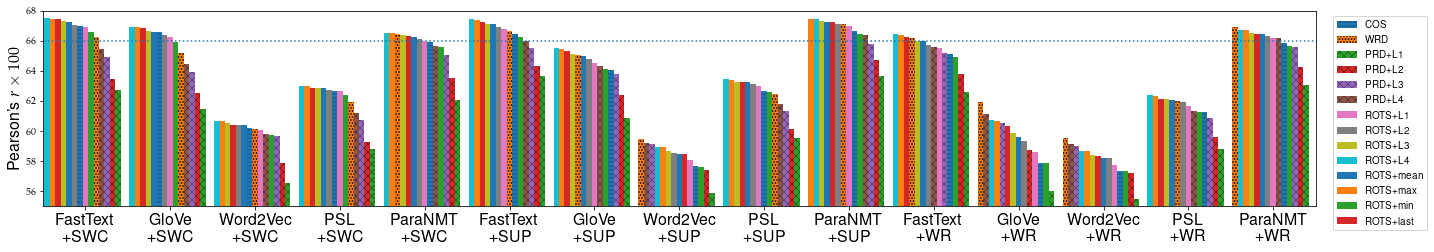

In [709]:
wv_names = {
    'fasttext': "FastText", 'glove840b': "GloVe", 'word2vec': "Word2Vec", 'psl': "PSL", 'paranmt': "ParaNMT"
}
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.3  # previous pdf hatch linewidth

def plot_bars(wvs, pres):
    labels = []
    data = defaultdict(list)
    for pre in pres:
        for wv in wvs:
            labels.append(wv_names[wv] + '\n+' + pre)
            d = get_bar_data(wv, pre)
            for k, v in d.items():
                data[k].append(v)
    # data[similarity] = [label#1 score, label#2 score, ...]
    # order[similarity] = [label#! order, label#2 order, ...]
    
    order = defaultdict(list)
    for i in range(len(labels)):
        score_list = [(k, data[k][i]) for k in data]
        sorted_score_list = sorted(score_list, key=lambda x: x[1], reverse=True)
        for i, (k, _) in enumerate(sorted_score_list):
            order[k].append(i)
    
    print(data, order)
    
    x = np.arange(len(labels))
    width = 0.9
    fig, ax = plt.subplots(figsize=(20, 3.6))
    bars = []
    
    def get_pos(_x, order): 
        return _x + width/len(data) * (order - len(data) // 2)
    
    for i, (k, v) in enumerate(data.items()):
        print(i, k, v)
        formatting = {}
        if k.split('+')[0] == 'COS':
            formatting['hatch'] = '---'
        if k.split('+')[0] == 'PRD':
            formatting['hatch'] = 'xxx'
        if k.split('+')[0] == 'WRD':
            formatting['hatch'] = 'oooo'
        
        positions = [get_pos(_x, order[k][_x]) for _x in range(len(labels))]
        bar = ax.bar(positions, v, width/len(data), label=k, **formatting)
    
    ax.set_ylabel(r"Pearson's $r \times 100$", fontsize=16)
    ax.set_ylim([55, 68])
#     ax.set_title("Ablation Study in Depth and Aggregation", fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=16)
    ax.set_xlim([-0.5, len(labels)-0.5])
    ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    ax.plot(np.linspace(-1, 20), np.ones(50)*66, ':')
    fig.tight_layout()
    fig.savefig('/Users/zihao/Nutstore Files/我的坚果云/Research/Sentence Similarity + Prior OT/acl-ijcnlp2021-templates/ablation_depth.pdf')
plot_bars(['fasttext', 'glove840b', 'word2vec', 'psl', 'paranmt'], ['SWC', 'SUP', 'WR'])

# strength

In [545]:
file = 'log/hyperparameter_dev_SWC_fasttext.csv'

In [645]:
def plot_CP(ax, file):
    df = pd.read_csv(file)
    clist = df['correction'].unique().tolist()
    plist = df['prior'].unique().tolist()
    print(clist, plist)
    
    
    for c in clist:
        pline = []
        cdf = df[df['correction'] == c]
        for p in plist:
            cpdf = cdf[cdf['prior'] == p]
            score = cpdf['mid'].mean()
            pline.append(score*100)
        ax.plot(plist, pline, 'o-', label=r'$\alpha={:.2f}$'.format(c))
    
    ax.set_xlabel(r'Prior $\epsilon$', fontsize=18)
    ax.set_xlim([0, 16])
    ax.set_ylim([49, 70])



[0.0, 0.25, 0.5, 0.75, 1.0] [1.0, 4.0, 7.0, 10.0, 13.0, 16.0]
[0.0, 0.25, 0.5, 0.75, 1.0] [1.0, 4.0, 7.0, 10.0, 13.0, 16.0]
[0.0, 0.25, 0.5, 0.75, 1.0] [1.0, 4.0, 7.0, 10.0, 13.0, 16.0]


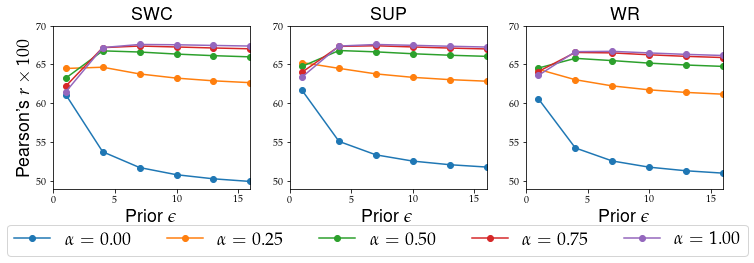

In [646]:
fformat = 'log/hyperparameter_dev_{}_{}.csv'

fig, axes = plt.subplots(ncols=3, figsize=(12, 3))

for i, wv in enumerate(['fasttext']):
    for j, pre in enumerate(['SWC', 'SUP', 'WR']):
        plot_CP(axes[j], fformat.format(pre, wv))
        axes[j].set_title(pre, fontsize=18)

axes[0].set_ylabel(r"Pearson's $r\times 100$", fontsize=18)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.), ncol=5, fontsize=18)
# fig.tight_layout()
fig.savefig("/Users/zihao/Nutstore Files/我的坚果云/Research/Sentence Similarity + Prior OT/acl-ijcnlp2021-templates/ec.png")

# Prepare the Appendix

## breakdown of core datasets with different parameters

In [696]:
for wv in VectorNames:
    for pre in ['SWC', 'SUP', 'WR']:
        show_data = defaultdict(list)
        for ds in datasets_core:
            for model in ['WRD', 'COS', 'ROTS']:
                filename = "log/major_compare_{}+{}/major_comparison.csv".format(model, pre)
                df = pd.read_csv(filename)
                sdf = df[df['dataset'] == ds]
                sdf = sdf[sdf['word vector'] == wv]
                for i, row in sdf.iterrows():
                    left = row['left'] * 100
                    right = row['right'] * 100
                    score = row['score'] * 100
                    BCa = "[{:.2f}, {:.2f}]".format(left, right)
                    modelraw = row['model']
                    base = modelraw.split('+')[0]
                    if base == 'ROTS':
                        if len(modelraw) == 9:
                            model = base + '+L' + modelraw[-1]
                        else:
                            model = base + '+' + modelraw[8:]
                    else:
                        model = base
                    show_data['model'].append(model)
                    show_data['score'].append("{:.2f}".format(score))
                    show_data['BCa 95% CI'].append(BCa)
                    show_data['dataset'].append(ds)
#                     show_data['dataset'] = ds
        show = pd.DataFrame(show_data)
        show = show.set_index('model')
        print(show.to_string())
        show.to_csv("out/app_1-breakdown-{}-{}.csv".format(wv, pre))

           score      BCa 95% CI       dataset
model                                         
WRD        73.01  [70.32, 75.35]     stsb:test
COS        74.22  [71.73, 76.54]     stsb:test
ROTS+L0    73.93  [71.36, 76.25]     stsb:test
ROTS+L1    74.06  [71.43, 76.41]     stsb:test
ROTS+L2    74.15  [71.55, 76.46]     stsb:test
ROTS+L3    74.14  [71.58, 76.44]     stsb:test
ROTS+L4    74.47  [71.87, 76.78]     stsb:test
ROTS+mean  74.37  [71.81, 76.73]     stsb:test
ROTS+max   74.41  [71.83, 76.67]     stsb:test
ROTS+min   74.03  [71.44, 76.36]     stsb:test
ROTS+last  74.37  [71.84, 76.66]     stsb:test
WRD        46.01  [40.33, 51.24]  twitter:test
COS        43.76  [38.16, 48.85]  twitter:test
ROTS+L0    43.62  [38.07, 48.76]  twitter:test
ROTS+L1    43.83  [38.19, 49.15]  twitter:test
ROTS+L2    43.90  [38.10, 49.26]  twitter:test
ROTS+L3    44.45  [38.75, 49.74]  twitter:test
ROTS+L4    44.82  [39.21, 50.08]  twitter:test
ROTS+mean  44.19  [38.65, 49.45]  twitter:test
ROTS+max   44

           score      BCa 95% CI       dataset
model                                         
WRD        74.58  [72.08, 76.81]     stsb:test
COS        74.78  [72.31, 77.06]     stsb:test
ROTS+L0    74.60  [72.08, 76.92]     stsb:test
ROTS+L1    74.84  [72.38, 77.09]     stsb:test
ROTS+L2    75.08  [72.64, 77.42]     stsb:test
ROTS+L3    75.25  [72.69, 77.57]     stsb:test
ROTS+L4    75.66  [73.17, 77.86]     stsb:test
ROTS+mean  75.33  [72.82, 77.56]     stsb:test
ROTS+max   75.53  [73.08, 77.77]     stsb:test
ROTS+min   74.80  [72.16, 77.14]     stsb:test
ROTS+last  75.47  [72.99, 77.64]     stsb:test
WRD        57.10  [52.42, 61.23]  twitter:test
COS        54.01  [49.35, 58.23]  twitter:test
ROTS+L0    53.74  [49.07, 57.98]  twitter:test
ROTS+L1    53.99  [49.38, 58.26]  twitter:test
ROTS+L2    54.09  [49.38, 58.41]  twitter:test
ROTS+L3    54.95  [50.26, 59.19]  twitter:test
ROTS+L4    55.56  [50.95, 59.88]  twitter:test
ROTS+mean  54.59  [49.93, 59.00]  twitter:test
ROTS+max   55

           score      BCa 95% CI       dataset
model                                         
WRD        70.64  [67.76, 73.22]     stsb:test
COS        70.41  [67.47, 73.05]     stsb:test
ROTS+L0    70.13  [67.23, 72.81]     stsb:test
ROTS+L1    70.44  [67.59, 73.09]     stsb:test
ROTS+L2    70.87  [68.02, 73.46]     stsb:test
ROTS+L3    71.03  [68.06, 73.57]     stsb:test
ROTS+L4    71.40  [68.58, 73.98]     stsb:test
ROTS+mean  70.92  [68.06, 73.46]     stsb:test
ROTS+max   71.40  [68.60, 73.96]     stsb:test
ROTS+min   70.05  [67.08, 72.66]     stsb:test
ROTS+last  71.22  [68.32, 73.74]     stsb:test
WRD        43.46  [38.05, 48.49]  twitter:test
COS        38.84  [33.44, 44.03]  twitter:test
ROTS+L0    38.46  [33.08, 43.54]  twitter:test
ROTS+L1    38.67  [33.18, 43.75]  twitter:test
ROTS+L2    39.03  [33.49, 43.93]  twitter:test
ROTS+L3    39.58  [33.98, 44.54]  twitter:test
ROTS+L4    40.03  [34.62, 45.28]  twitter:test
ROTS+mean  39.21  [33.82, 44.34]  twitter:test
ROTS+max   40

In [ ]:
for wv in VectorNames:
    for pre in ['SWC', 'SUP', 'WR']:
        show_data = defaultdict(list)
        for ds in datasets_core:
            for model in ['WRD', 'COS', 'ROTS']:
                filename = "log/major_compare_{}+{}/major_comparison.csv".format(model, pre)
                df = pd.read_csv(filename)
                sdf = df[df['dataset'] == ds]
                sdf = sdf[sdf['word vector'] == wv]
                for i, row in sdf.iterrows():
                    left = row['left'] * 100
                    right = row['right'] * 100
                    score = row['score'] * 100
                    BCa = "[{:.2f}, {:.2f}]".format(left, right)
                    modelraw = row['model']
                    base = modelraw.split('+')[0]
                    if base == 'ROTS':
                        if len(modelraw) == 9:
                            model = base + '+L' + modelraw[-1]
                        else:
                            model = base + '+' + modelraw[8:]
                    else:
                        model = base
                    show_data['model'].append(model)
                    show_data['score'].append("{:.2f}".format(score))
                    show_data['BCa 95% CI'].append(BCa)
                    show_data['dataset'].append(ds)
#                     show_data['dataset'] = ds
        show = pd.DataFrame(show_data)
        show = show.set_index('model')
        print(show.to_string())
        show.to_csv("out/app_1-breakdown-{}-{}.csv".format(wv, pre))